# Results of different d values

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
results = pd.read_csv('./d_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','d','num_agents'], as_index=False).mean()

results.head()

,planner,d,num_agents,num_robots,f,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,3,300,17.0,2.0,131.697500,131.697500,1.517010,16848.174031,300.0
1,IterativeAssignmentPlanner,5,300,10.0,2.0,203.790126,203.790126,1.417100,22642.191358,300.0
2,IterativeAssignmentPlanner,10,300,5.0,2.0,386.859276,386.859276,1.381389,44086.305516,300.0
3,IterativeAssignmentPlanner,15,300,4.0,2.0,489.164633,489.164633,1.360750,57066.791432,300.0
4,KmeansAssignmentPlanner,3,300,17.0,2.0,156.034758,156.034758,2.032818,20311.065654,300.0


In [19]:
num_agents = 300

results = results.loc[results['num_agents']==num_agents]

planners_names = ['StaticLinePlanner', 'TravelingLinePlanner', 'Practical100TravelingLinePlanner',
                  'SeparateTravelingPlanner','IterativeAssignmentPlanner','KmeansAssignmentPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* agent speed v is 1
* robot speed fv is 2
* agent num n is 300

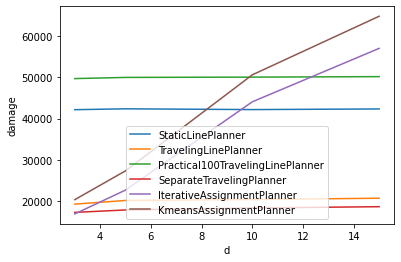

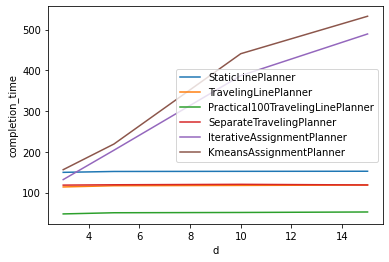

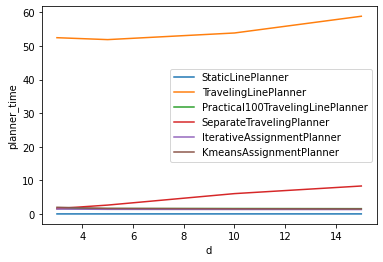

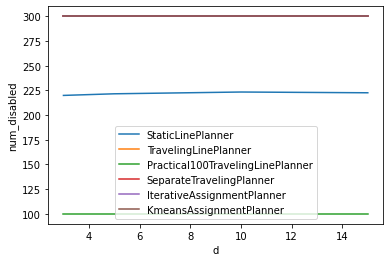

In [20]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['d' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()